### <span style = "color:orange">1.Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

Xây dựng và đánh giá tập hợp các mô hình dự báo chuỗi thời gian để dự đoán nhiệt độ cực đại hàng ngày tại các khu vực đô thị và ven biển Việt Nam. Dự án áp dụng cả thuật toán Machine Learning truyền thống và Deep Learning hiện đại nhằm cải thiện độ chính xác dự báo so với các phương pháp thống kê thông thường.

<b>Nguồn dữ liệu</b>: Bộ dữ liệu ERA5 (ECMWF) với các bản ghi nhiệt độ từ 1990 đến 2024, được xử lý và biến đổi để huấn luyện các mô hình như Random Forest, XGBoost, LSTM, Transformer, TFT, và N-BEATS.

<b>Kết quả</b>: Đánh giá hiệu năng giữa các mô hình qua nhiều kịch bản thực nghiệm và đề xuất hệ thống cảnh báo nhiệt độ sớm ứng dụng thực tế.

#### <span style="color:green">1.2. Data source and description</span>

<h4>Thông tin dữ liệu trong đề tài:</h4>

<ul>
<li><b>Thời gian thu thập:</b> từ năm <b>1990 đến 2024</b></li>
<li><b>Định dạng ban đầu:</b> .grib, sau đó chuyển đổi sang .csv để xử lý</li>
</ul>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>NAME</code></td><td>Tên tỉnh/thành phố nơi thu thập dữ liệu</td><td>-</td></tr>
<tr><td><code>LATITUDE</code></td><td>Vĩ độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>LONGITUDE</code></td><td>Kinh độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>YMD</code></td><td>Ngày/tháng/năm đo đạc</td><td>dd/mm/yyyy</td></tr>
<tr><td><code>YEAR</code></td><td>Năm đo đạc</td><td>Năm</td></tr>
<tr><td><code>MONTH</code></td><td>Tháng đo đạc</td><td>Tháng</td></tr>
<tr><td><code>DAY</code></td><td>Ngày đo đạc</td><td>Ngày</td></tr>
<tr><td><code>TEMP_max</code></td><td>Nhiệt độ không khí cực đại trong ngày</td><td>°C</td></tr>
<tr><td><code>TEMP_ave</code></td><td>Nhiệt độ trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_ave</code></td><td>Điểm sương trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_max</code></td><td>Điểm sương cao nhất trong ngày</td><td>°C</td></tr>
<tr><td><code>RH_ave</code></td><td>Độ ẩm tương đối trung bình trong ngày</td><td>%</td></tr>
<tr><td><code>RH_max</code></td><td>Độ ẩm tương đối cực đại trong ngày</td><td>%</td></tr>
<tr><td><code>AT_ave</code></td><td>Nhiệt độ cảm nhận trung bình trong ngày (Apparent Temp.)</td><td>°C</td></tr>
<tr><td><code>AT_max</code></td><td>Nhiệt độ cảm nhận cao nhất trong ngày</td><td>°C</td></tr>
</tbody>
</table>

<p><b>Biến mục tiêu chính:</b></p>
<ul>
<li><code>TEMP_max</code> — Nhiệt độ không khí cực đại hàng ngày (°C)</li>
</ul>

<p><b>Lưu ý:</b> Dữ liệu gốc của ERA5 có thể chứa giá trị thiếu, giá trị ngoại lai và một số dị bản khí tượng đặc thù. Do đó, quá trình làm sạch dữ liệu, xử lý giá trị thiếu, phát hiện ngoại lệ và chuẩn hóa dữ liệu là các bước bắt buộc trước khi tiến hành huấn luyện và dự báo.</p>

In [ ]:
match_type = {
    'NAME'       : 'Categorical',        # Tên tỉnh/thành phố (chuỗi)
    'LATITUDE'   : 'Numerical',          # Vĩ độ (°)
    'LONGITUDE'  : 'Numerical',          # Kinh độ (°)
    'YMD'        : 'Datetime',           # Ngày/tháng/năm (dd/mm/yyyy)
    'YEAR'       : 'Numerical',          # Năm (năm)
    'MONTH'      : 'Numerical',          # Tháng (1-12)
    'DAY'        : 'Numerical',          # Ngày (1-31)

    'TEMP_max'   : 'Numerical',          # Nhiệt độ cực đại trong ngày (°C)
    'TEMP_ave'   : 'Numerical',          # Nhiệt độ trung bình trong ngày (°C)
    'DEW_ave'    : 'Numerical',          # Điểm sương trung bình trong ngày (°C)
    'DEW_max'    : 'Numerical',          # Điểm sương cực đại trong ngày (°C)
    'RH_ave'     : 'Numerical',          # Độ ẩm tương đối trung bình trong ngày (%)
    'RH_max'     : 'Numerical',          # Độ ẩm tương đối cực đại trong ngày (%)
    'AT_ave'     : 'Numerical',          # Nhiệt độ cảm nhận trung bình trong ngày (°C)
    'AT_max'     : 'Numerical'           # Nhiệt độ cảm nhận cực đại trong ngày (°C)
}

#### <span style="color:green">1.3. Goals</span>

Most accuracy as much as possible

### <span style="color:orange">2.Import Libraries</span>

#### <span style="color:green">2.1. Configuration and display settings</span>

In [4]:
import sys
sys.path.append("../src")

import config
import dataset
import features
import plots

#### <span style="color:green">2.2. Required Python packages</span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

### <span style="color:orange">3.Data Loading</span>

#### <span style="color:green">3.1. Loading the dataset</span>

In [4]:
train_df = pd.read_csv("../data/train.csv", index_col = "id")
test_df  = pd.read_csv("../data/test.csv" , index_col = "id")

#### <span style="color:green">3.2. Displaying first few rows</span>

In [5]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [6]:
test_df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,NaN,NaN,y,NaN,w,t,z,NaN,d,a


#### <span style="color:green">3.3. Data summary</span>

In [7]:
train_df.shape

(3116945, 21)

In [8]:
test_df.shape

(2077964, 20)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077964 entries, 3116945 to 5194908
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 332.9+ MB


### <span style="color:orange">4.Data Cleaning</span>

#### <span style="color:green">4.1. Handling missing values</span>

##### <span style="color:tomato">Missing Values<span>

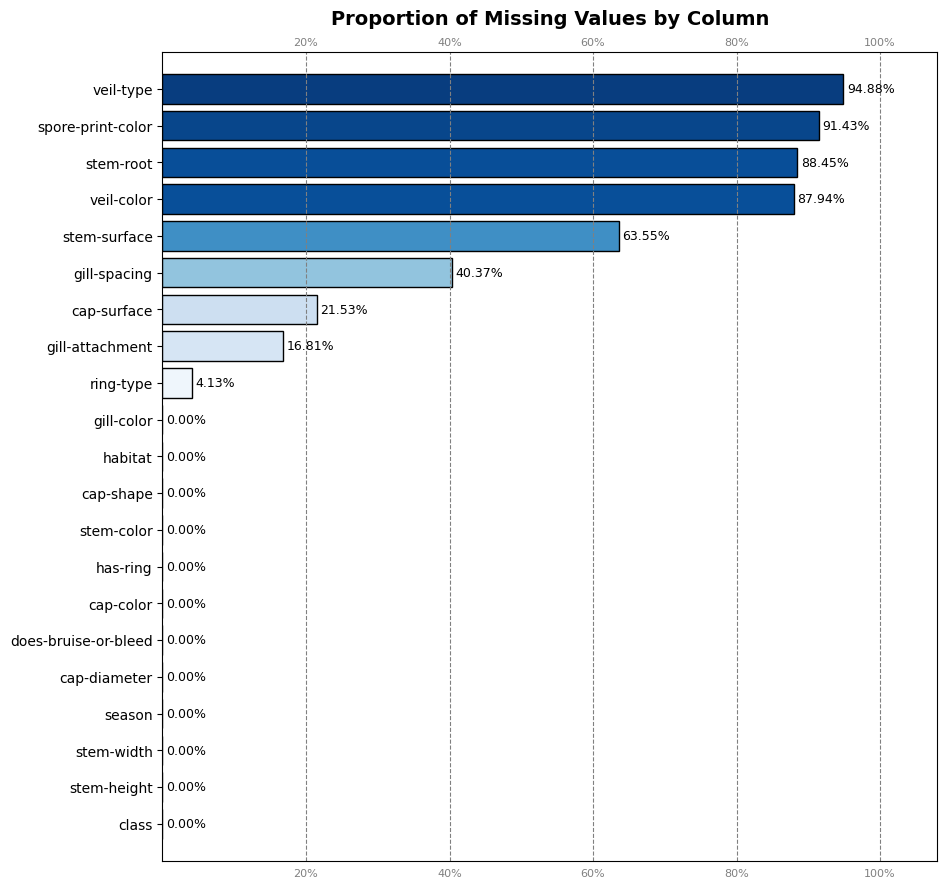

In [11]:
script.ProportionMissing_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Replace Missing Values<span>

Numerical

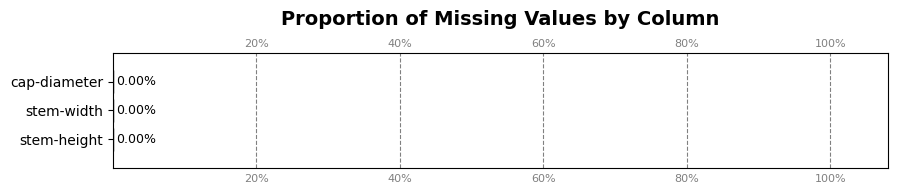

In [12]:
numerical   = train_df.select_dtypes(exclude=['object']).columns
script.ProportionMissing_aproach2(
    data = train_df[numerical],
    # data = test_df[numerical]
)

In [13]:
train_df[numerical] = script.HandleMissing_aproach2(train_df[numerical])
test_df[numerical] = script.HandleMissing_aproach2(test_df[numerical])

g:\My Drive\GoodNotes\SGU_CNTT(CLC)\Năm 3\Kì 2\Phân Tích Dữ Liệu\Thực Hành\DoAn\code\../scripts\script.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]  = data[col].fillna(mode_value)


Categorical

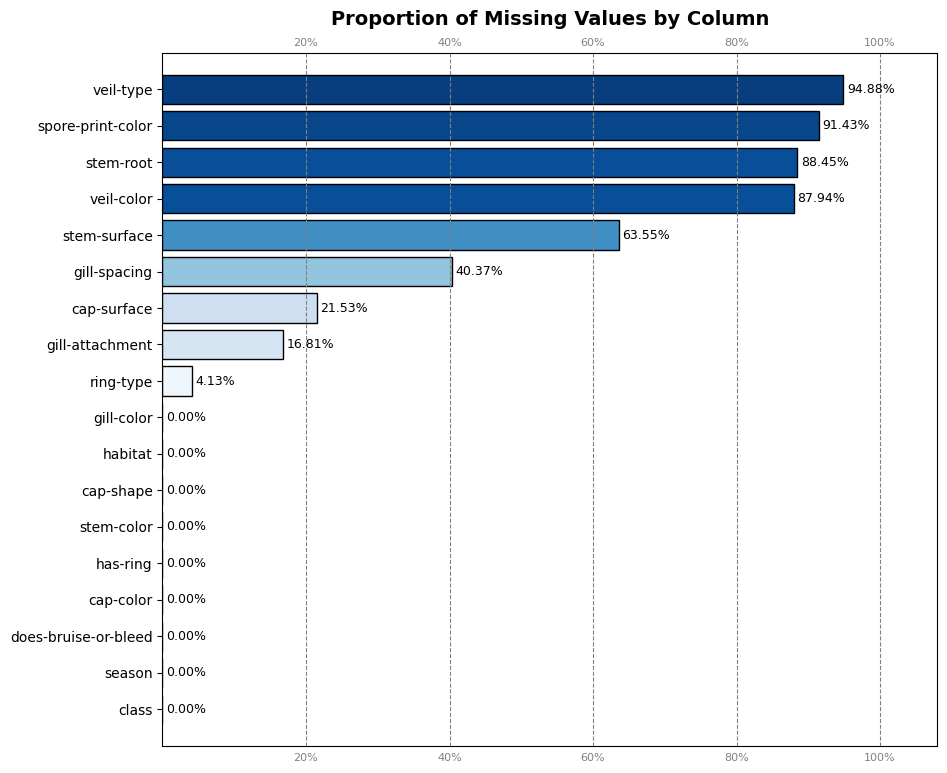

In [14]:
categorical   = train_df.select_dtypes(include=['object']).columns

script.ProportionMissing_aproach2(
    data = train_df[categorical],
    # data = test_df[categorical.drop("class")]
)

In [15]:
categorical   = train_df.select_dtypes(include=['object']).columns

train_df[categorical] = script.HandleMissing_aproach2(train_df[categorical])
test_df[categorical.drop("class")] = script.HandleMissing_aproach2(test_df[categorical.drop("class")])

g:\My Drive\GoodNotes\SGU_CNTT(CLC)\Năm 3\Kì 2\Phân Tích Dữ Liệu\Thực Hành\DoAn\code\../scripts\script.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]  = data[col].fillna(mode_value)
g:\My Drive\GoodNotes\SGU_CNTT(CLC)\Năm 3\Kì 2\Phân Tích Dữ Liệu\Thực Hành\DoAn\code\../scripts\script.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]  = data[col].fillna(mode_value)


##### <span style="color:tomato">Checking Missing values again</span>

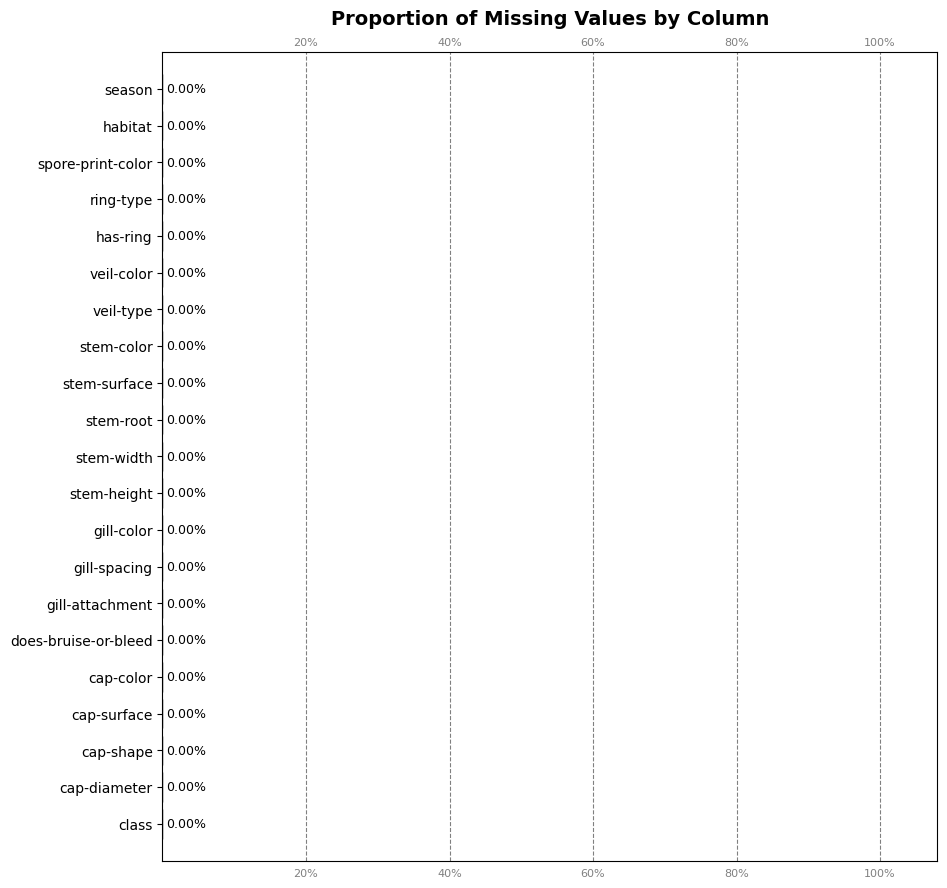

In [16]:
script.ProportionMissing_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Explore "numerical" variables</span>

In [17]:
train_df[numerical].value_counts()
# test_df[numerical].value_counts()

cap-diameter  stem-height  stem-width
2.23          3.51         3.56          22
1.51          6.14         2.27          18
2.58          3.93         3.49          18
0.93          3.10         2.45          16
2.80          2.82         5.56          16
                                         ..
62.06         5.13         32.01          1
62.30         17.88        68.48          1
62.40         7.11         45.08          1
64.46         7.16         45.03          1
0.30          3.40         0.66           1
Name: count, Length: 2987753, dtype: int64

##### <span style="color:tomato">Explore "categorical" variables</span>

In [18]:
train_df[categorical].value_counts()
# test_df[categorical.drop("class")].value_counts()

class  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  stem-root  stem-surface  stem-color  veil-type  veil-color  has-ring  ring-type  spore-print-color  habitat  season
p      x          i            e          f                     a                c             e           b          s             e           u          w           f         f          n                  d        a         14841
e      f          e            b          f                     a                c             b           b          s             w           u          w           t         f          k                  d        a         12679
p      x          t            n          f                     a                d             w           b          s             w           u          w           f         f          k                  d        u          8833
       s          t            p          t                     d                

##### <span style="color:tomato">Explore "cap-shape" variables</span>

In [19]:
train_df["cap-shape"].value_counts(dropna=False).head(50)
# test_df["cap-shape"].value_counts(dropna=False)

cap-shape
x            1436066
f             676238
s             365146
b             318646
o             108835
p             106967
c             104520
d                 65
e                 60
n                 41
w                 36
t                 36
g                 34
y                 33
r                 32
a                 30
u                 27
z                 22
l                 21
i                 14
k                 13
h                  6
m                  2
8                  2
3.55               2
7 x                2
4.97               2
is s               1
19.29              1
2.85               1
21.56              1
3.6                1
24.16              1
5 f                1
6 x                1
ring-type          1
is p               1
10.13              1
7.43               1
0.82               1
10.46              1
4.22               1
2.77               1
2.94               1
5.15               1
12.62              1
19.04              1
49.

In [20]:
train_df["cap-shape"].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [21]:
valid_values = ['b', 'c', 'x', 'f', 'k', 's']
invalid_values = train_df[~train_df['cap-shape'].isin(valid_values)]
print(invalid_values['cap-shape'].unique())

['p' 'o' 'd' 'e' 'n' 'w' 'l' '19.29' '5 f' 't' 'g' 'z' 'a' '2.85' '7 x'
 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56' 'i' '6 x' '24.16' '8' 'm'
 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82' '10.46' '2.77' '2.94'
 '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13' '1.66' '3.37' '7.21'
 '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29' '54.78' '20.25' '3.52'
 '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44' '4.33' '2.82' '6.53'
 '19.06']


##### <span style="color:tomato">Explore "cap-surface" variables</span>

In [22]:
train_df["cap-surface"].value_counts(dropna=False)
# # test_df["cap-surface"].value_counts(dropna=False)

cap-surface
t        1131800
s         384970
y         327826
h         284460
g         263729
          ...   
10.34          1
10.1           1
1.08           1
is k           1
0.87           1
Name: count, Length: 83, dtype: int64

In [23]:
train_df["cap-surface"].unique()

array(['s', 'h', 'y', 'l', 't', 'e', 'g', 'd', 'i', 'w', 'k', '15.94',
       'f', 'n', 'r', 'o', 'a', 'u', 'z', '2.7', 'does l', '5.07', 'p',
       'b', 'm', 'cap-diameter', '1.43', 'x', '7.14', 'c', 'is h',
       'does t', '0.85', '6.57', '12.79', '6.45', '4.66', '23.18', '3.06',
       '16.39', '4.21', 'veil-color', '11.78', '8.1', 'has-ring',
       'does h', '1.42', 'class', 'has h', 'does None', '10.83', 'season',
       '8.96', '14.04', '5.73', 'is None', '24.38', '2.81', '0.88',
       '2.11', '2.79', 'ring-type', 'does-bruise-or-bleed', '4.93',
       'spore-print-color', 'spore-color', '2.92', '2.51', '7.99', 'is y',
       '3.64', '3.33', '41.91', '12.2', '8.01', '9.22', '1.14', '6.49',
       '10.34', '10.1', '1.08', 'is k', '0.87'], dtype=object)

##### <span style="color:tomato">Explore "cap-color" variables</span>

In [24]:
train_df["cap-color"].value_counts(dropna=False)
# # test_df["cap-color"].value_counts(dropna=False)

cap-color
n        1359554
y         386627
w         379442
g         210825
e         197290
          ...   
20.02          1
20             1
25.98          1
8.67           1
9.02           1
Name: count, Length: 78, dtype: int64

In [25]:
train_df["cap-color"].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

##### <span style="color:tomato">Explore "does-bruise-or-bleed" variables</span>

In [26]:
train_df["does-bruise-or-bleed"].value_counts(dropna=False)
# # test_df["does-bruise-or-bleed"].value_counts(dropna=False)

does-bruise-or-bleed
f           2569751
t            547085
w                14
c                11
h                 9
b                 7
y                 7
a                 7
x                 7
s                 6
k                 6
d                 4
e                 4
p                 4
l                 4
z                 3
o                 3
g                 3
n                 2
i                 2
has-ring          1
r                 1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [27]:
train_df["does-bruise-or-bleed"].unique()

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', 'g', 'y', 'r',
       'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e', '4.42',
       '2.9', 'u'], dtype=object)

##### <span style="color:tomato">Explore "gill-attachment" variables</span>

In [28]:
train_df["gill-attachment"].value_counts(dropna=False)
# # test_df["gill-attachment"].value_counts(dropna=False)

gill-attachment
a        1169970
d         589236
x         360878
e         301858
s         295439
          ...   
16.27          1
11.26          1
2.79           1
is f           1
13.94          1
Name: count, Length: 78, dtype: int64

In [29]:
train_df["gill-attachment"].unique()

array(['a', 'x', 's', 'd', 'e', 'f', 'p', 'l', 'm', 'b', '32.54', 'n',
       'g', 'i', 'u', 'does-bruise-or-bleed', 't', 'o', 'c', 'w', '4.64',
       'k', 'r', '4.77', 'h', 'p p', '7.92', 'z', 'season', 'y', '8.79',
       'does None', 'has f', 'ring-type', '16.33', '10.85', '20.07',
       '2.82', '7.86', '3.91', 'does', '10.23', '6.74', '0.92', '3.45',
       '1', 'is a', '3.71', '50.44', '11.62', 'has d', '1.32', '8.47',
       '6.11', '2.41', '2.54', '6.32', '19.65', '15.49', '4.01', '8.37',
       'does f', '28.7', '13.15', '1.37', '28.15', '7.09', '9.88', '2.67',
       '18.21', '1.48', '5.93', '1.51', '16.27', '11.26', '2.79', 'is f',
       '13.94'], dtype=object)

##### <span style="color:tomato">Explore "gill-spacing" variables</span>

In [30]:
train_df["gill-spacing"].value_counts(dropna=False)
# # test_df["gill-spacing"].value_counts(dropna=False)

gill-spacing
c              2589489
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
g                    4
k                    4
h                    3
l                    3
y                    2
r                    2
6.67                 2
0                    2
9.01                 1
2.69                 1
3.61                 1
class                1
4.8                  1
4.04                 1
3.57                 1
i                    1
w                    1
24.38                1
cap-surface          1
0.73                 1
5.22                 1
3.92                 1
5.42                 1
12.27                1
1                    1
1.6                  1
n                    1
3.81                 1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.7                  

In [31]:
train_df["gill-spacing"].unique()

array(['c', 'd', 'f', 'x', 'b', 'a', '3.61', '2.69', 'k', '4.8', 'e', 'y',
       'class', 's', '9.01', 'p', '3.92', '5.22', '6.67', '4.04', 't',
       '0.73', 'i', '3.57', '24.38', 'w', 'h', 'cap-surface', 'l', '1',
       '12.27', '5.42', 'r', '1.6', 'n', 'g', '0', '3.81', '4.09', '1.36',
       '3.24', '5.55', '5.7', '3.62', 'does f', '6.4', '1.88', '55.13'],
      dtype=object)

##### <span style="color:tomato">Explore "gill-color" variables</span>

In [32]:
train_df["gill-color"].value_counts(dropna=False)
# # test_df["gill-color"].value_counts(dropna=False)

gill-color
w            931595
n            543386
y            469464
p            343626
g            212164
              ...  
16.41             1
6.41              1
veil-type         1
20.44             1
8.37              1
Name: count, Length: 63, dtype: int64

In [33]:
train_df["gill-color"].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', '18.12', 'l', 'does w', 'a',
       '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

##### <span style="color:tomato">Explore "stem-root" variables</span>

In [34]:
train_df["stem-root"].value_counts(dropna=False)
# # test_df["stem-root"].value_counts(dropna=False)

stem-root
b                    2922824
s                     116946
r                      47803
c                      28592
f                        597
d                         24
y                         14
g                         12
w                         12
p                         12
k                         11
l                         10
t                         10
n                         10
x                          9
i                          8
u                          8
a                          7
e                          6
o                          5
h                          4
m                          4
z                          2
5.59                       1
2.77                       1
20.01                      1
3.63                       1
10.87                      1
16.88                      1
15.69                      1
3.23                       1
1.48                       1
20.0                       1
18.06                      1
spor

In [35]:
train_df["stem-root"].unique()

array(['b', 'c', 'r', 's', 'f', '5.59', '2.77', '20.01', 'y', 'o', 'k',
       'd', 'n', 'w', 'u', 'p', 'x', 'i', '10.87', 'a', '3.63', 't', 'm',
       'l', 'h', 'g', '16.88', '15.69', '1.48', '3.23', 'e', '20.0',
       '18.06', 'z', 'spore-print-color', '3.49', '13.03', '7.15'],
      dtype=object)

##### <span style="color:tomato">Explore "stem-surface" variables</span>

In [36]:
train_df["stem-surface"].value_counts(dropna=False)
# # test_df["stem-surface"].value_counts(dropna=False)

stem-surface
s                       2308471
y                        255500
i                        224346
t                        147974
g                         78080
k                         73383
h                         28283
f                           512
w                            49
d                            48
e                            36
n                            34
x                            26
b                            23
c                            22
l                            20
r                            20
p                            20
u                            16
o                            15
a                            11
m                             7
season                        6
0.0                           3
10.48                         2
z                             2
does-bruise-or-bleed          2
5.56                          2
1.59                          1
25.83                         1
3.89                       

In [37]:
train_df["stem-surface"].unique()

array(['s', 'y', 't', 'g', 'h', 'k', 'i', 'f', 'l', 'd', 'x', '12.04',
       'w', 'a', 'o', 'c', 'n', 'm', 'e', 'p', 'z', '6.58', '4.34', 'b',
       '3.89', 'r', '25.83', '1.59', '0.0', '5.97', '5.81', 'u', 'season',
       '10.48', '3.68', '5.56', '4.41', '5.48', '5.51', 'class',
       'has-ring', '13.1', '17.46', '5.35', '7.23', 'does None', '1.03',
       'does s', '7.45', 'has h', 'does-bruise-or-bleed', '1.94', '49.46',
       '19.35', '2.68', '4.74', 'spore-print-color', '10.93', '24.12',
       '13.94'], dtype=object)

##### <span style="color:tomato">Explore "stem-color" variables</span>

In [38]:
train_df["stem-color"].value_counts(dropna=False)
# # test_df["stem-color"].value_counts(dropna=False)

stem-color
w                    1196675
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
spore-print-color          2
class                      2
3.13                       1
1.75                       1
e n                        1
7.33                       1
is n                       1
2.78                       1
23.59                      1
8.32                       1
33.

In [39]:
train_df["stem-color"].unique()

array(['w', 'o', 'n', 'y', 'e', 'u', 'p', 'f', 'g', 'r', 'k', 'l', 'b',
       '3.13', 't', 'z', 'a', 'h', 'd', 's', '7.33', 'is n', 'i', 'c',
       'x', 'e n', '1.75', 'm', '33.52', 'ring-type', '2.78',
       'spore-print-color', '23.59', '8.32', 'is w', '26.4', '4.75',
       '7.84', 'class', '2.75', '8.49', '4.49', '1.41', '17.45', '3.53',
       '12.92', '3.98', '20.07', '7.7', '22.6', '6.31', '6.09', '3.56',
       '3.37', '4.62', '2.54', '39.51', '18.06', '4.33'], dtype=object)

##### <span style="color:tomato">Explore "veil-type" variables</span>

In [40]:
train_df["veil-type"].value_counts(dropna=False)
# # test_df["veil-type"].value_counts(dropna=False)

veil-type
u          3116866
w               11
a                9
e                8
f                8
c                5
b                5
y                4
k                4
g                4
n                3
s                3
d                2
h                2
i                2
p                2
r                2
21.11            1
t                1
is None          1
l                1
5.94             1
Name: count, dtype: int64

In [41]:
train_df["veil-type"].unique()

array(['u', 'd', 'a', 'h', '21.11', 'g', 'c', 'e', 'y', 'i', 'f',
       'is None', 't', 'w', 'p', 'b', 's', 'k', 'r', 'l', 'n', '5.94'],
      dtype=object)

##### <span style="color:tomato">Explore "veil-color" variables</span>

In [42]:
train_df["veil-color"].value_counts(dropna=False)
# # test_df["veil-color"].value_counts(dropna=False)

veil-color
w       3020017
y         30473
n         30039
u         14026
k         13080
e          9169
g            30
p            23
r            14
o            13
s            11
t             7
a             7
d             6
i             6
h             5
f             4
c             4
l             4
b             3
8.25          1
2.49          1
z             1
3.32          1
Name: count, dtype: int64

In [43]:
train_df["veil-color"].unique()

array(['w', 'n', 'k', 'y', 'e', 'u', 'p', 'd', 'g', 'r', 'h', 's', '8.25',
       't', 'c', 'o', 'i', '2.49', 'f', 'a', 'b', 'l', 'z', '3.32'],
      dtype=object)

##### <span style="color:tomato">Explore "has-ring" variables</span>

In [44]:
train_df["has-ring"].value_counts(dropna=False)
# # test_df["has-ring"].value_counts(dropna=False)

has-ring
f             2368844
t              747982
r                  16
h                  13
c                  11
s                  11
l                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
o                   2
k                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [45]:
train_df["has-ring"].unique()

array(['f', 't', 'h', 'r', 'y', 'c', 'e', 'g', 'l', 's', 'p', 'x', 'k',
       'z', 'f has-ring', 'd', 'o', 'n', 'm', 'i', '10.3', 'w', 'a'],
      dtype=object)

##### <span style="color:tomato">Explore "ring-type" variables</span>

In [46]:
train_df["ring-type"].value_counts(dropna=False)
# # test_df["ring-type"].value_counts(dropna=False)

ring-type
f                       2606050
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
4                             1
15                            1
3.12                          1
does-bruise-or-bleed          1
11                            

In [47]:
train_df["ring-type"].unique()

array(['f', 'z', 'e', 'p', 'l', 'g', 'r', 'm', 'y', 'h', 'o', 't',
       'ring-type', 'a', 'd', 's', 'x', '4', 'b', '15', 'u', 'n', 'w',
       'does f', '3.12', 'i', 'season', 'k', 'c', 'does-bruise-or-bleed',
       '11', '23.6', '1', '14', '2', 'spore-print-color', 'class', 'sp',
       '2.87', '8.25'], dtype=object)

##### <span style="color:tomato">Explore "spore-print-color" variables</span>

In [48]:
train_df["spore-print-color"].value_counts(dropna=False)
# # test_df["spore-print-color"].value_counts(dropna=False)

spore-print-color
k             2956992
p               68237
w               50173
n               22646
r                7975
u                7256
g                3492
y                  36
s                  21
c                  16
f                  14
e                  14
a                  13
t                  13
d                   9
l                   8
b                   5
m                   4
h                   3
o                   3
veil-color          2
i                   2
x                   2
2.49                1
9 None              1
10 None             1
class               1
2.62                1
season              1
9.55                1
6.36                1
4.58                1
Name: count, dtype: int64

In [49]:
train_df["spore-print-color"].unique()

array(['k', 'w', 'p', 'n', 'r', 'u', 'g', 't', 'f', 'd', 'l', 'y', 'a',
       's', '2.49', 'e', 'o', 'c', 'b', '10 None', 'h', 'x', '9 None',
       'i', 'm', 'veil-color', 'class', '2.62', 'season', '9.55', '6.36',
       '4.58'], dtype=object)

##### <span style="color:tomato">Explore "habitat" variables</span>

In [50]:
train_df["habitat"].value_counts(dropna=False)
# # test_df["habitat"].value_counts(dropna=False)

habitat
d                       2177618
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
8.09                          1
17.1                          1
is w                          1
9.28                          1


In [51]:
train_df["habitat"].unique()

array(['d', 'l', 'g', 'h', 'p', 'm', 'u', 'w', 'y', 'n', 'a', 's', 'k',
       'habitat', 'z', '8.09', '17.1', 'b', 't', 'c', '9.28', 'ring-type',
       'e', 'r', 'does-bruise-or-bleed', 'f', 'is w', 'o', '2.94', 'x',
       '4', 'is h', '5.56', 'class', 'i', '10.07', '7.31', '5.62',
       'spore-print-color', 'cap-diameter', '3.11', '16.46', '7.37',
       'veil-type', '17.38', '1.66', '6.63', '18.35', '6.75', '2.44',
       '3.68', '2.25'], dtype=object)

##### <span style="color:tomato">Explore "season" variables</span>

In [52]:
train_df["season"].value_counts(dropna=False)
# # test_df["season"].value_counts(dropna=False)

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [53]:
train_df["season"].unique()

array(['a', 'w', 'u', 's'], dtype=object)

#### <span style="color:green">4.2. Handling mismatched values</span>

##### <span style="color:tomato">Mismatched Values<span>

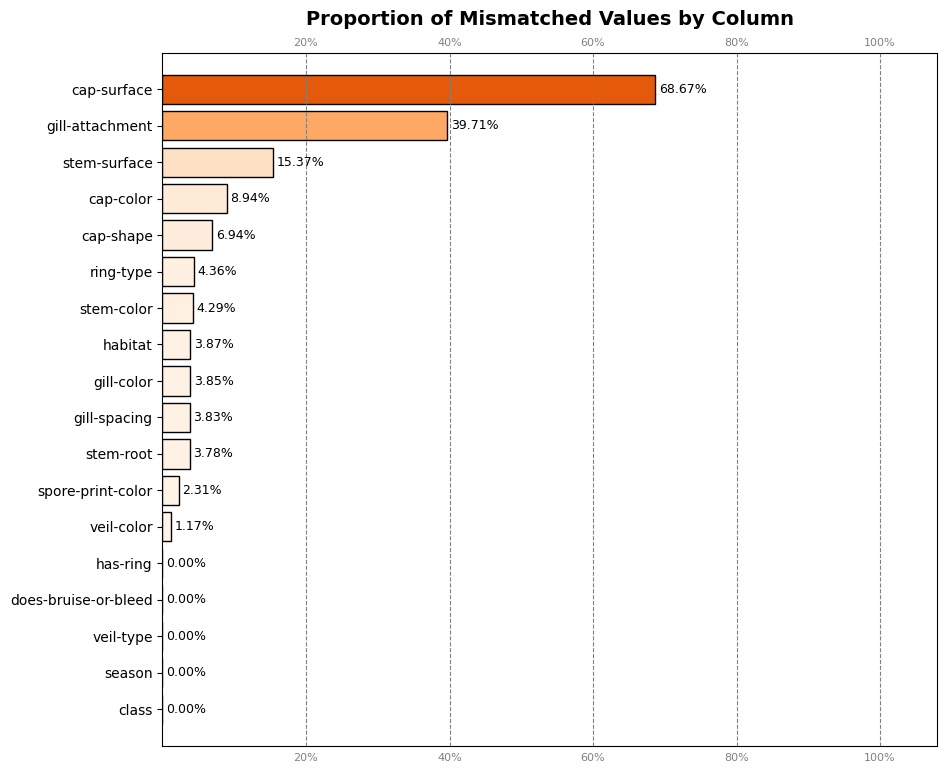

In [54]:
script.ProportionMismatch_aproach2(
    data       = train_df,
    # data       = test_df,
    match_type = match_type
)

##### <span style="color:tomato">Remove Mismatched Values<span>

In [55]:
train_df[categorical]              = script.HandleMismatch_aproach2(train_df[categorical], match_type)
test_df[categorical.drop("class")] = script.HandleMismatch_aproach2(test_df[categorical.drop("class")], match_type)

##### <span style="color:tomato">Check Mismatched Values again<span>

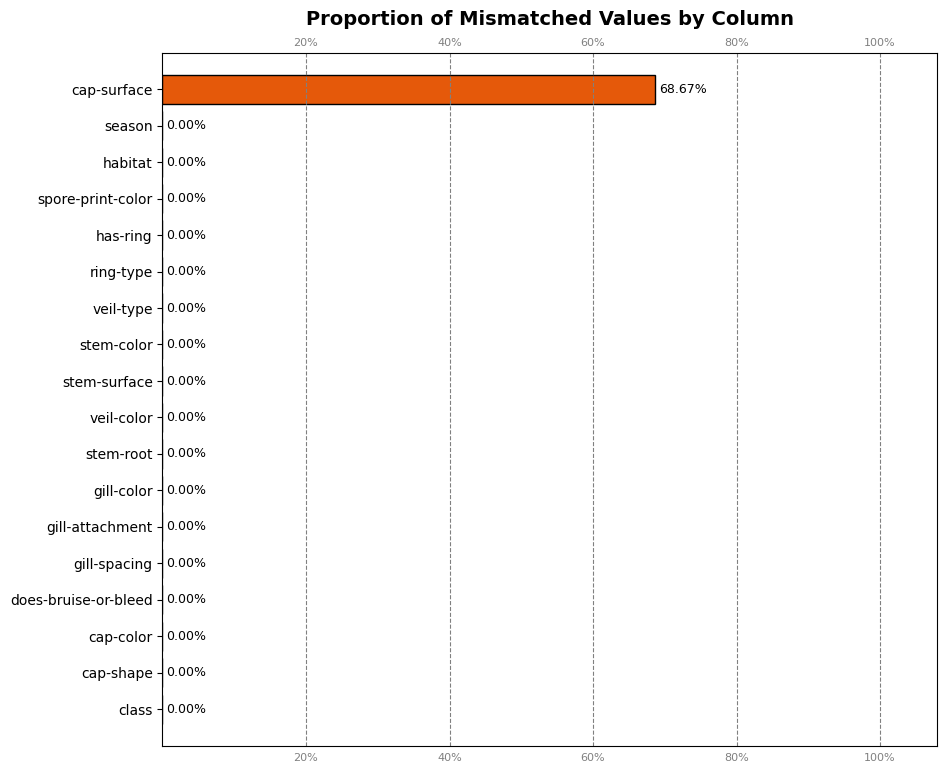

In [56]:
script.ProportionMismatch_aproach2(
    data       = train_df,
    # data       = test_df,
    match_type = match_type
)

#### <span style="color:green">4.3. Removing duplicates</span>

##### <span style="color:tomato">Duplicate Values<span>

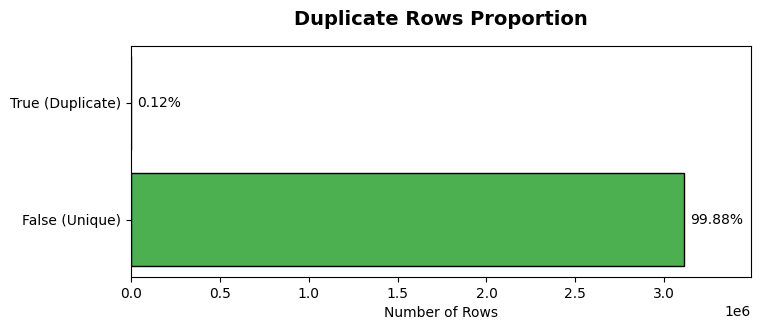

In [57]:
script.ProportionDuplicate_aproach2(
    data = train_df,
    # data = test_df
)

##### <span style="color:tomato">Remove Duplicate Values<span>

In [58]:
train_df = script.HandleDuplicate_aproach1(train_df)
test_df  = script.HandleDuplicate_aproach1(test_df)

##### <span style="color:tomato">Check Duplicate Values again<span>

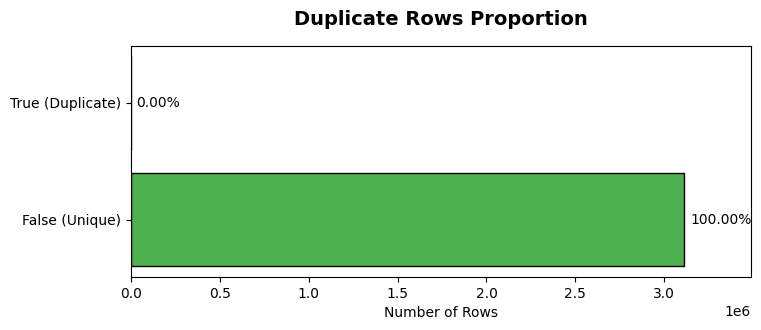

In [59]:
script.ProportionDuplicate_aproach2(
    data = train_df,
    # data = test_df
)

#### <span style="color:green">4.4. Data type conversion</span>

In [60]:
print(type(categorical.tolist()))

<class 'list'>


In [61]:
# Chuyển cột Date thành kiểu datetime
# TVM_data['date_time'] = pd.to_datetime(TVM_data['date_time'], format='%d/%m/%Y %H')

'''
    Các kiểu khác number (int, float, double,...) trong python mà khai báo trong df,series,dict,... thì mặc định là kiểu object
    nhưng khi search thì nó vẫn là kiểu str nhé
    ~> chắc hiển thị cho dễ nhìn á
'''

train_df[categorical] = train_df[categorical].astype(str) 
train_df.info()
# test_df[categorical.drop("class")] = test_df[categorical.drop("class")].astype(str) 
# test_df.info()

C:\Users\tanda\AppData\Local\Temp\ipykernel_6176\3794198893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical] = train_df[categorical].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 3113338 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 522.6+ MB


In [62]:
# print(type(train_df['cap-shape'].iloc[0]))
print(type(test_df['cap-shape'].iloc[0]))

<class 'str'>


#### <span style="color:green">4.5. Outlier detection</span>

##### <span style="color:tomato">IQR<span>

Outliers

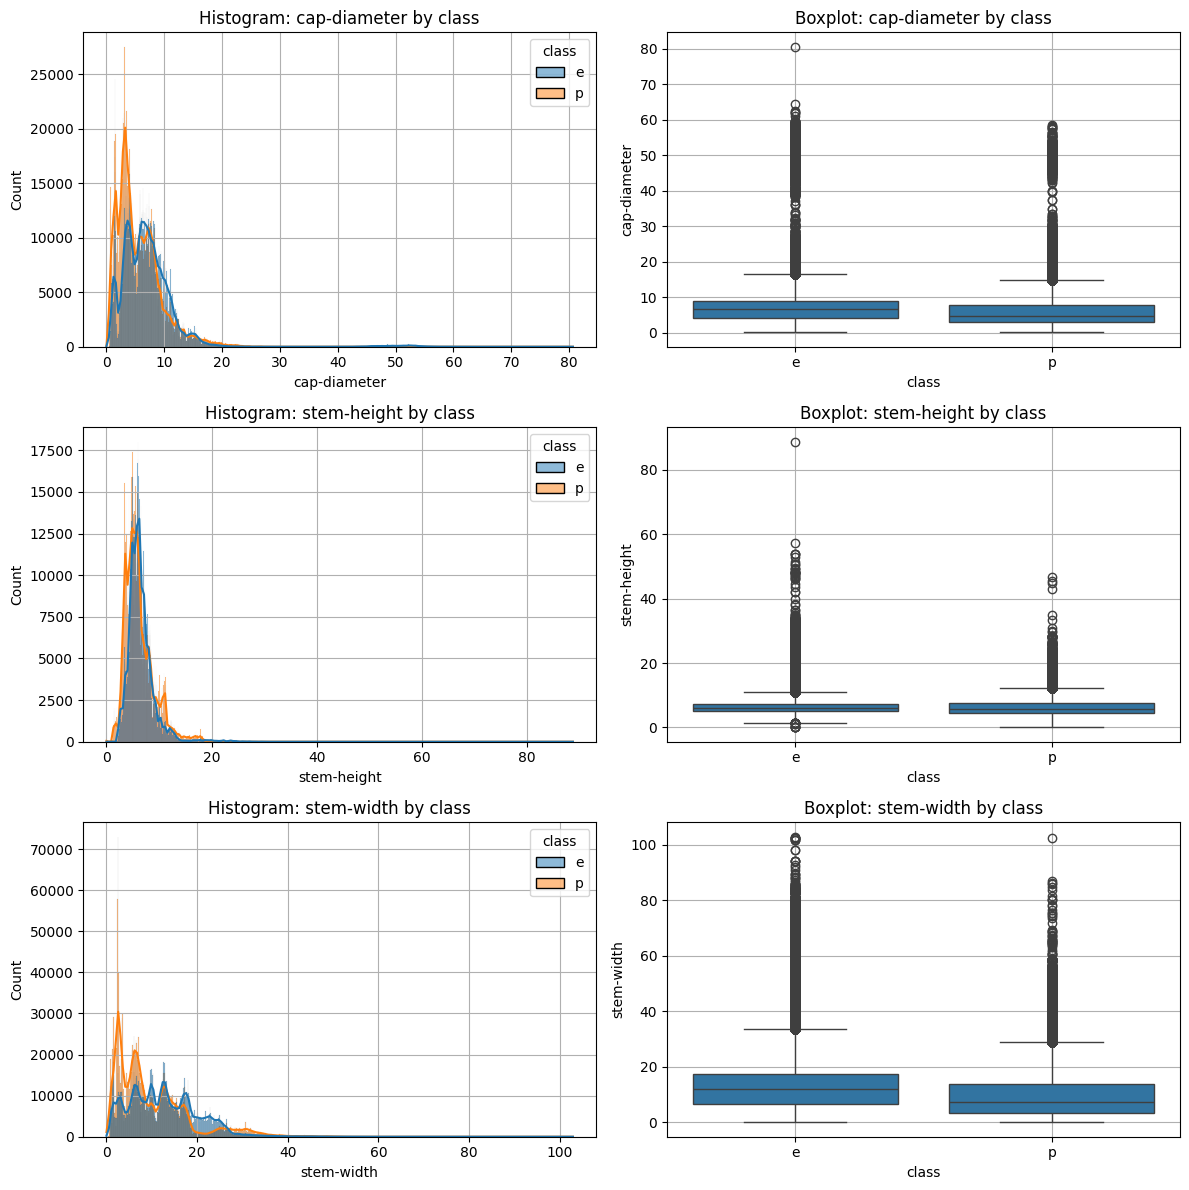

In [63]:
script.plot_Outlier(train_df, numerical, target = "class")

In [64]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_iqr(train_df[numeric])
# script.find_outlier_iqr(test_df[numeric]) -- khong uncomment dong nay

cap-diameter        : 76108 outliers (2.44%)
stem-height         : 132301 outliers (4.25%)
stem-width          : 66764 outliers (2.14%)


Remove Outliers

In [65]:
# Apply the function
train_df_no_outliers = script.remove_outliers_iqr(train_df, numeric)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Original Data Size           : 3113338
After Removing Outliers Size : 2708323
Data Retained Percentage     : 86.99%


(2708323, 21)

Check Outliers Again

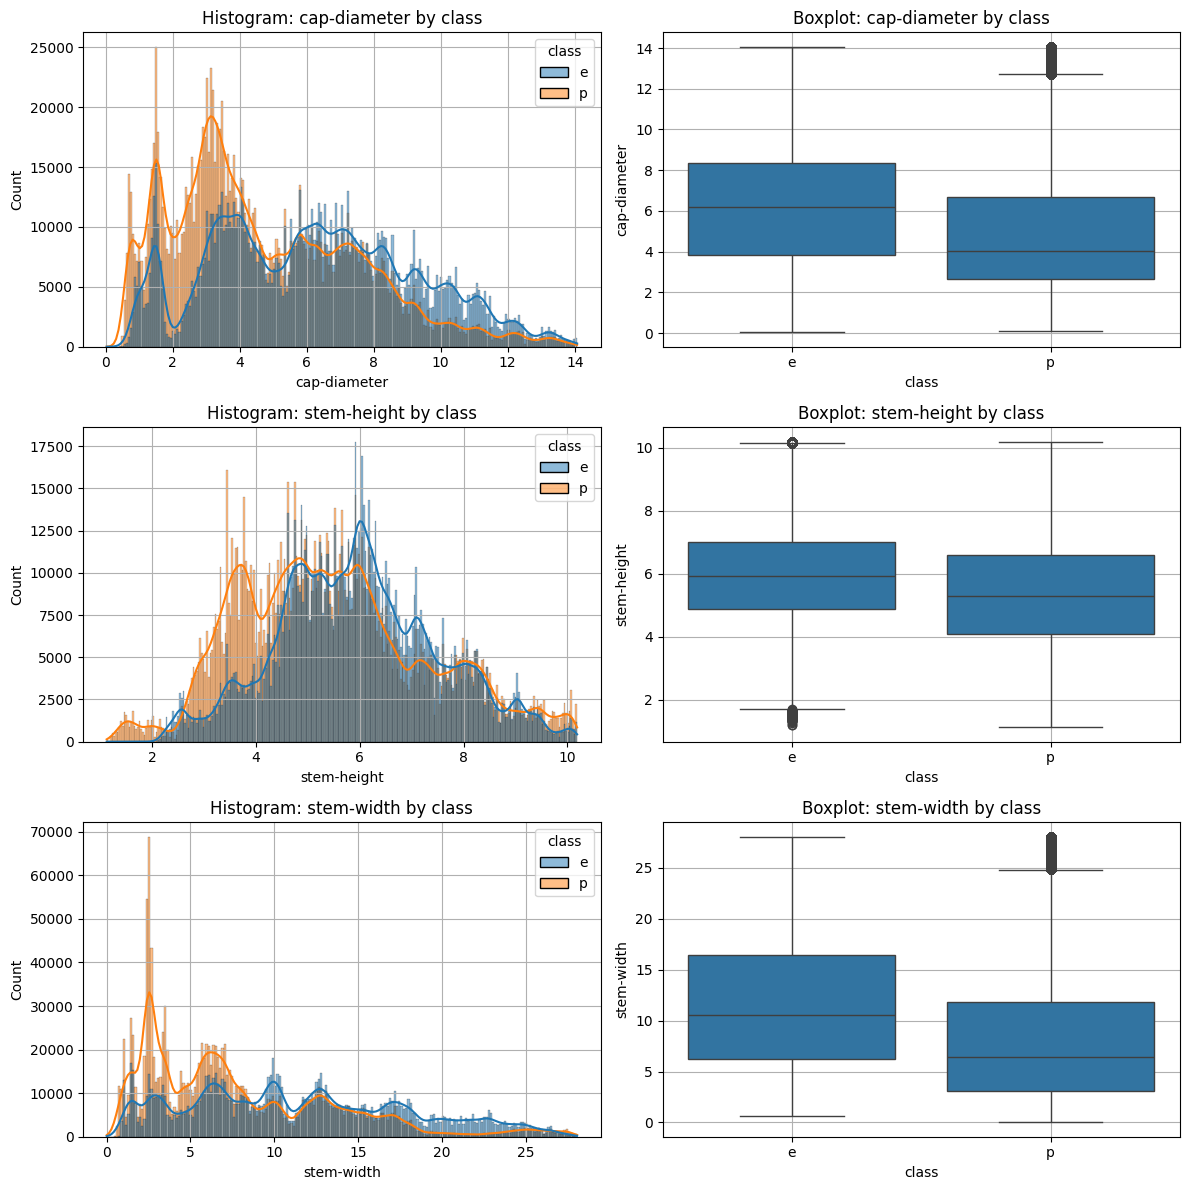

In [66]:
script.plot_Outlier(train_df, numerical, target="class")

##### <span style="color:tomato">Percentile<span>

Outliers

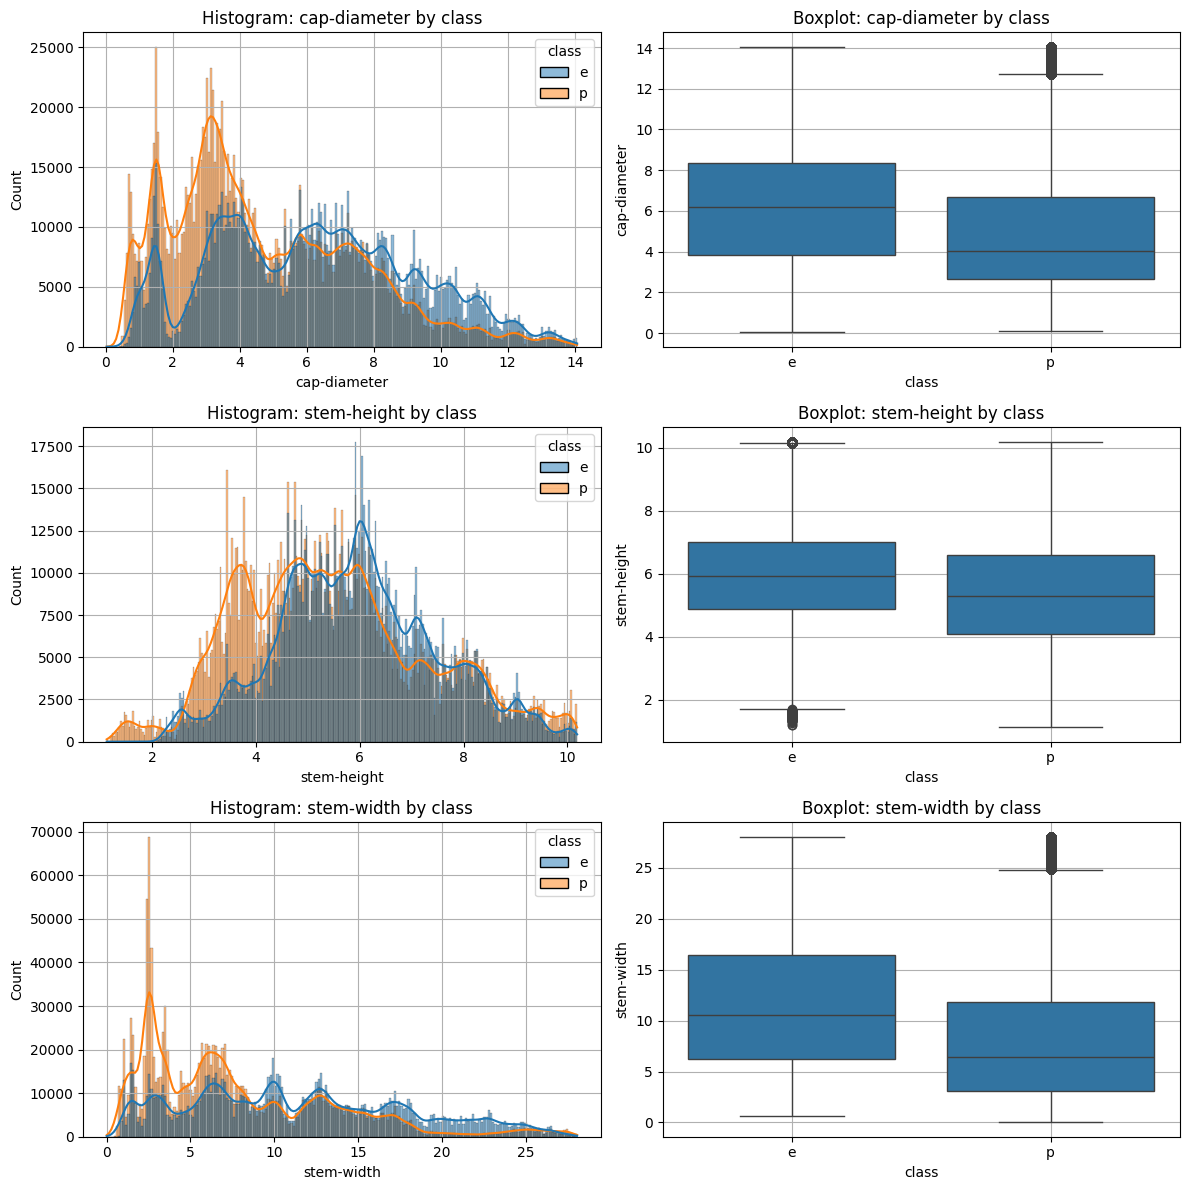

In [67]:
script.plot_Outlier(train_df, numerical, target="class")

In [68]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_percentile(train_df[numeric])
# script.find_outlier_percentile(test_df[numeric]) -- khong uncomment dong nay

cap-diameter        : 53112 outliers (1.96%)
stem-height         : 53017 outliers (1.96%)
stem-width          : 53256 outliers (1.97%)


Remove Outliers

In [69]:
# Apply the function
train_df_no_outliers = script.remove_outliers_percentile(train_df, numeric)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Original Data Size           : 2708323
After Removing Outliers Size : 25527
Data Retained Percentage     : 0.94%


(25527, 21)

Check Outliers Again

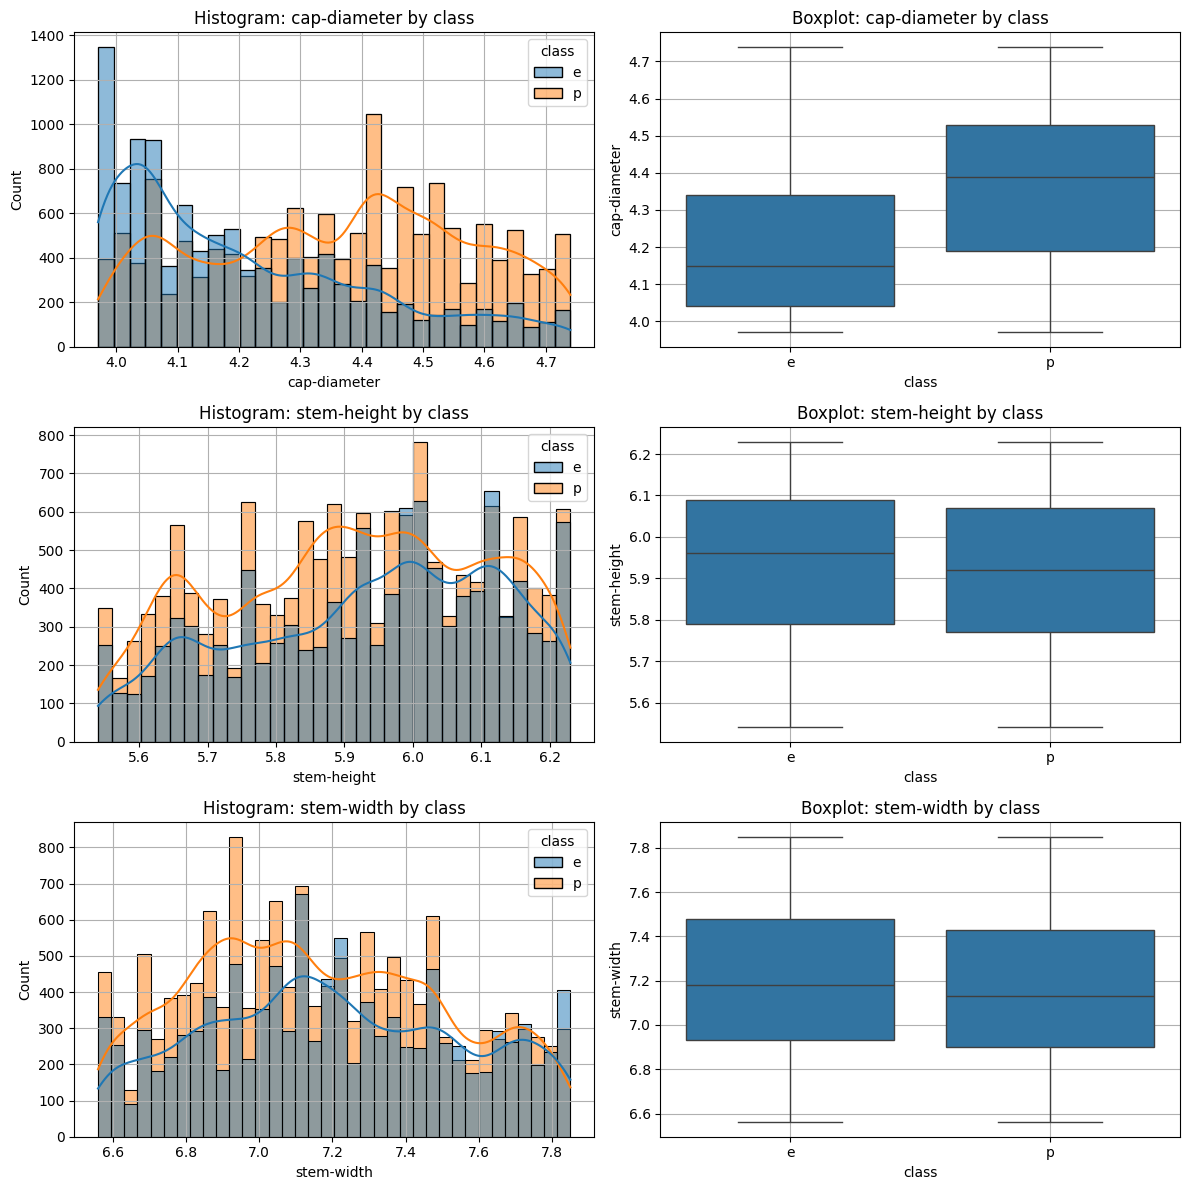

In [70]:
script.plot_Outlier(train_df, numerical, target = "class")

##### <span style="color:tomato">Z_score<span>

Outliers

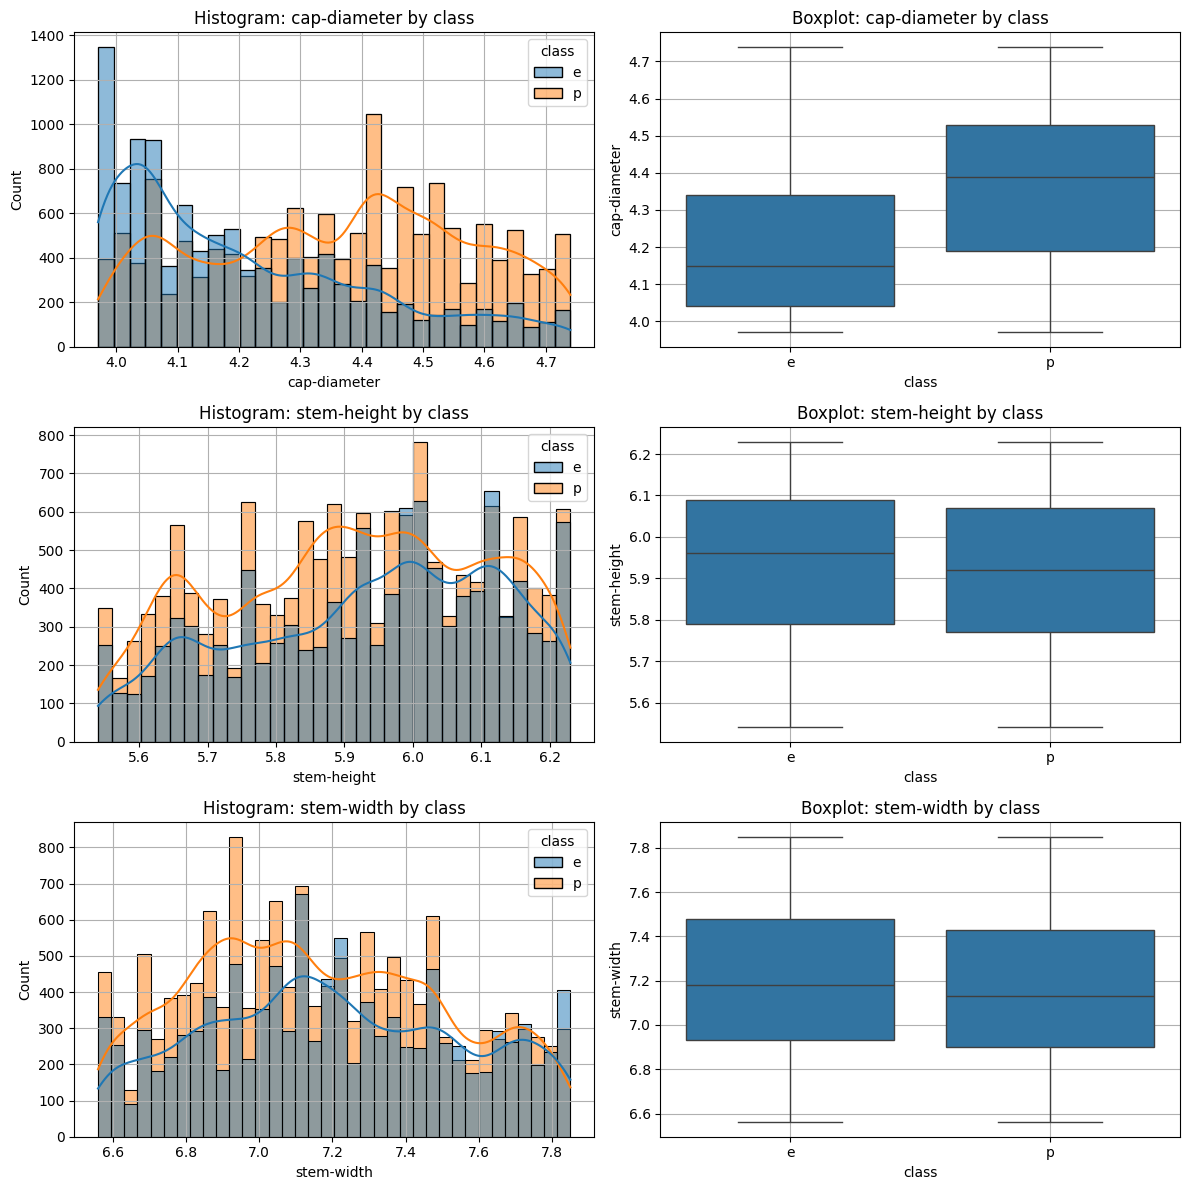

In [71]:
# Example usage
script.plot_Outlier(train_df, numerical, target = "class")

In [72]:
numeric = train_df.select_dtypes(include='number').columns

script.find_outlier_zscore(train_df[numeric])
# # script.find_outlier_zscore(test_df[numeric]) -- khong uncomment dong nay

cap-diameter        : 0 outliers (0.00%)
stem-height         : 0 outliers (0.00%)
stem-width          : 0 outliers (0.00%)


Remove Outliers

In [73]:
# Apply the function
train_df_no_outliers = script.remove_outliers_zscore(train_df,numerical)
train_df = deepcopy(train_df_no_outliers)
train_df.shape

Original Data Size           : 25527
After Removing Outliers Size : 25527
Data Retained Percentage     : 100.00%


(25527, 21)

Check Outliers Again

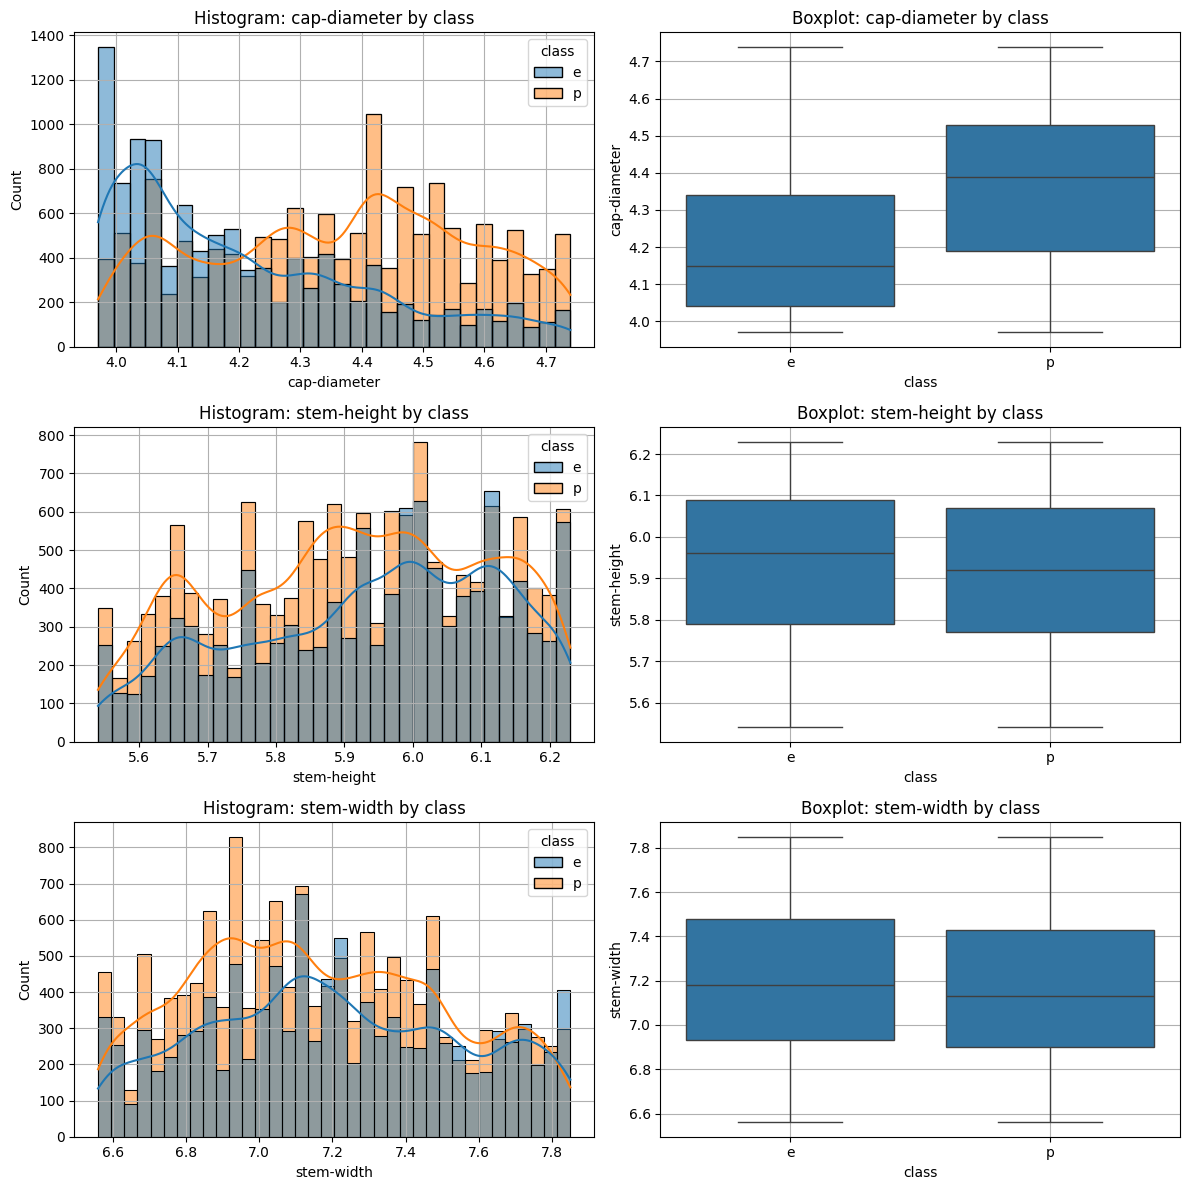

In [74]:
script.plot_Outlier(train_df, numerical, target = "class")

#### <span style="color:green">4.5. Save data</span>

In [75]:
train_df.reset_index(inplace=True)                          # Chuyển index thành cột bình thường, giữ tên là 'id'
test_df.reset_index(inplace=True)                           # Chuyển index thành cột bình thường, giữ tên là 'id'
train_df.to_csv('../data/train_cleaned.csv', index = False) # Lưu mà không cần ghi thêm cột index
test_df.to_csv('../data/test_cleaned.csv', index = False)   # Lưu mà không cần ghi thêm cột index